# Clothing Item Price Prediction 👚

*By aditya yadav*

## Exploratory Data Analysis (EDA) 🔎

In [1]:
# Necessary imports

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/luisjdtt/data-science-final-project-itm/main/data/clothing_items.csv
!wget https://raw.githubusercontent.com/luisjdtt/data-science-final-project-itm/main/data/clothing_items_new2_1000.csv
!wget https://raw.githubusercontent.com/luisjdtt/data-science-final-project-itm/main/data/clothing_items_new_500.csv

In [53]:
# Concatenate all samples collected and display the first five.

df0 = pd.read_csv("clothing_items.csv", sep=",")
df1 = pd.read_csv("clothing_items_new_500.csv", sep=",")
df2 = pd.read_csv("clothing_items_new2_1000.csv", sep=",")

df = pd.concat([df0, df1, df2], ignore_index=True)
df.head()

,type,brand,material,style,color,state,price
0,shirt,zara,cotton,casual,white,new,29.99
1,dress,forever21,polyester,formal,red,used,45.50
2,shoes,adidas,leather,athletic,black,new,89.99
3,jacket,levis,denim,casual,blue,used,59.99
4,pants,zara,cotton,formal,black,new,49.99


In [54]:
# Print a concise summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      1945 non-null   object 
 1   brand     1945 non-null   object 
 2   material  1945 non-null   object 
 3   style     1945 non-null   object 
 4   color     1945 non-null   object 
 5   state     1945 non-null   object 
 6   price     1945 non-null   float64
dtypes: float64(1), object(6)
memory usage: 106.5+ KB


In [9]:
# General descriptive statistics.
df.describe()

,price
count,1945.000000
mean,121.487728
std,175.161573
min,14.990000
25%,39.990000
50%,69.990000
75%,109.990000
max,1299.990000


In [ ]:
df.columns

Index(['type', 'brand', 'material', 'style', 'color', 'state', 'price'], dtype='object')

In [21]:
# Functions for visualization

# Bar Chart
def plot_bar_chart(data, column):
    value_counts = data[column].value_counts()
    colors = ['#FFB6C1', '#87CEEB', '#FFD700', '#98FB98', '#CD5C5C']
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color=colors)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de columna "{column}"')
    plt.xticks(rotation=45)
    plt.show()

# Pie chart
def plot_pie_chart(data, column):
    value_counts = data[column].value_counts()
    plt.figure(figsize=(10, 6))
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f'Distribución de {column}')
    plt.show()

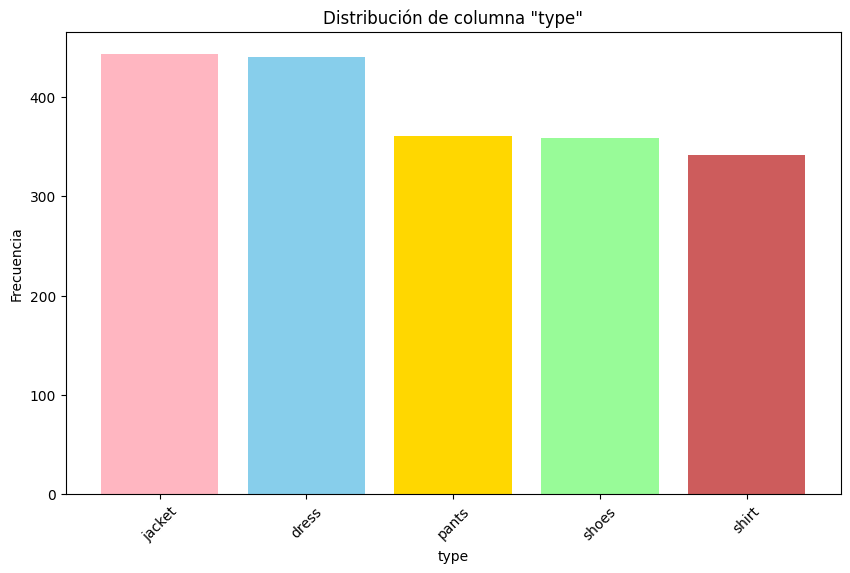

In [22]:
plot_bar_chart(df, 'type')  

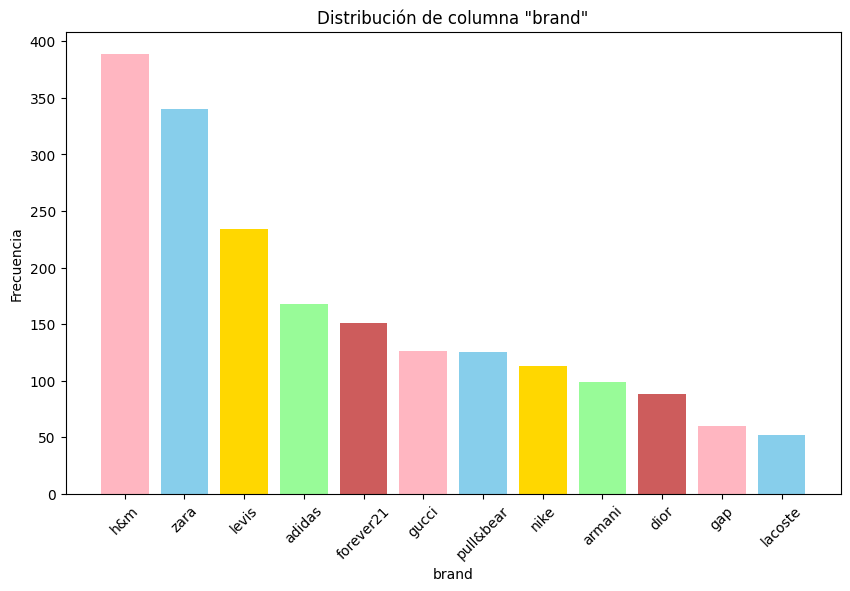

In [23]:
plot_bar_chart(df, 'brand')  

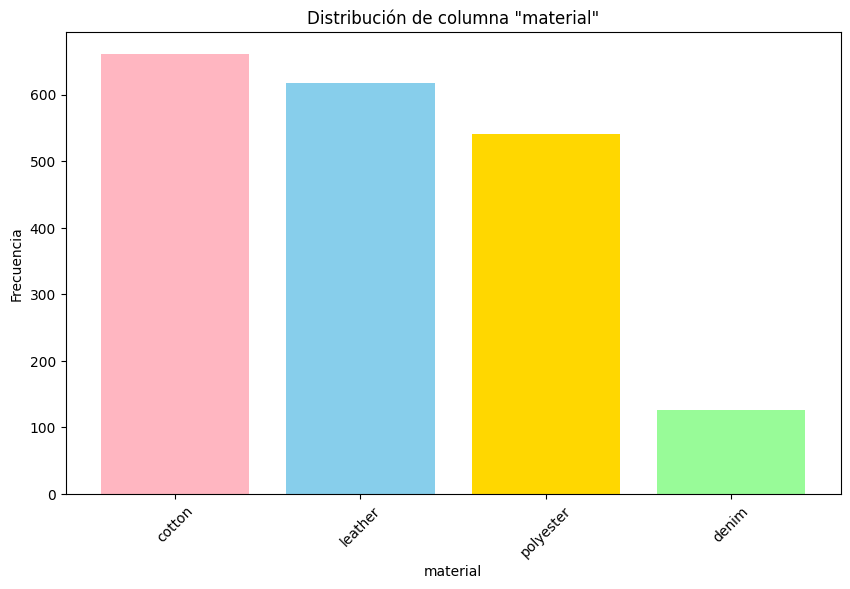

In [24]:
plot_bar_chart(df, 'material')  

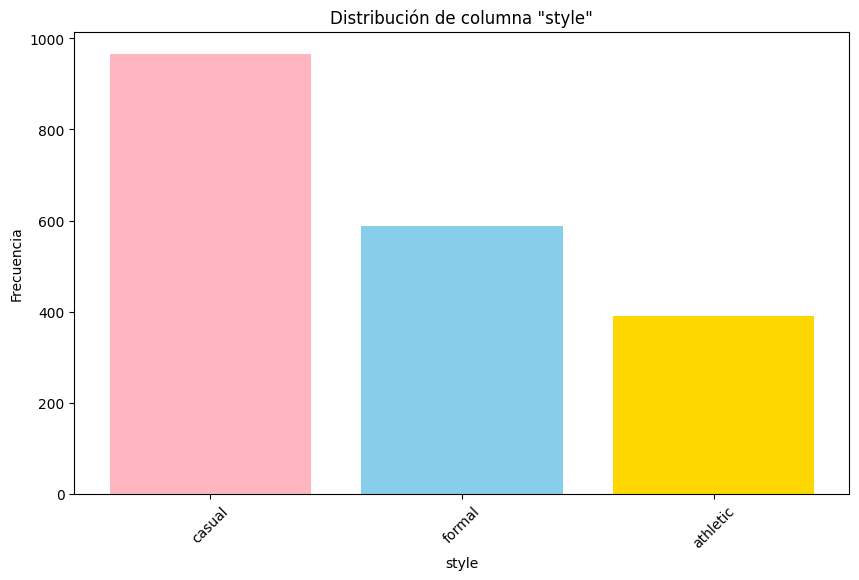

In [25]:
plot_bar_chart(df, 'style')  

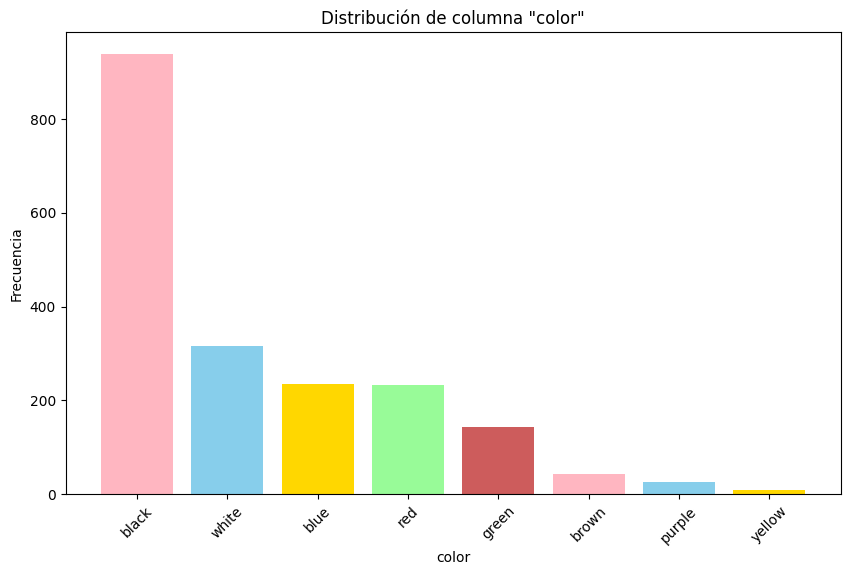

In [26]:
plot_bar_chart(df, 'color')  

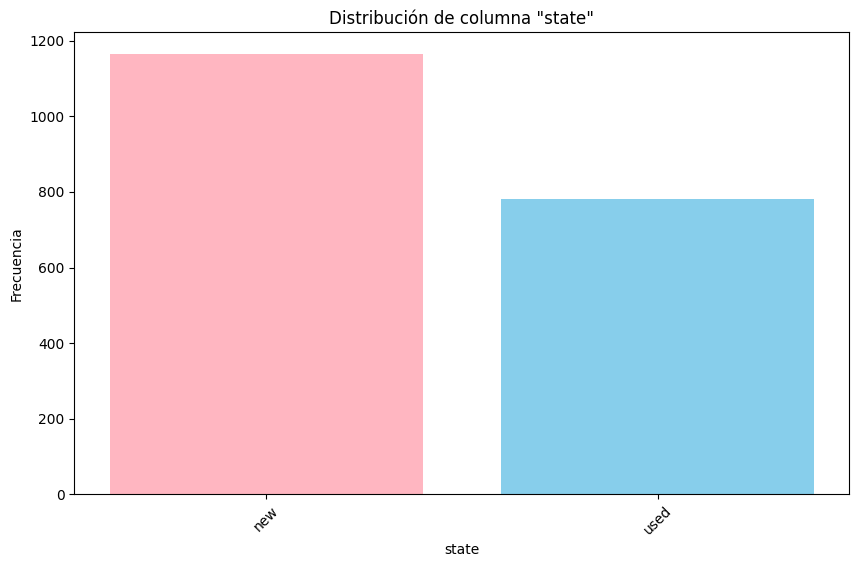

In [27]:
plot_bar_chart(df, 'state')  

In [ ]:
df.nunique()

type         5
brand       12
material     4
style        3
color        8
state        2
price       41
dtype: int64

In [ ]:
df.isnull().sum()

type        0
brand       0
material    0
style       0
color       0
state       0
price       0
dtype: int64

In [ ]:
print("Analysis of TYPE feature")
df['type'].value_counts()

Analysis of TYPE feature


jacket    339
dress     306
shoes     274
pants     264
shirt     262
Name: type, dtype: int64

In [ ]:
print("Analysis of BRAND feature")
df['brand'].value_counts()

Analysis of BRAND feature


h&m          273
zara         230
levis        165
adidas       133
forever21    117
pull&bear     97
gucci         94
armani        86
nike          84
dior          76
lacoste       46
gap           44
Name: brand, dtype: int64

In [ ]:
print("Analysis of MATERIAL feature")
df['material'].value_counts()

Analysis of MATERIAL feature


cotton       492
leather      478
polyester    385
denim         90
Name: material, dtype: int64

In [ ]:
print("Analysis of STYLE feature")
df['style'].value_counts()

Analysis of STYLE feature


casual      722
formal      431
athletic    292
Name: style, dtype: int64

In [ ]:
print("Analysis of COLOR feature")
df['color'].value_counts()

Analysis of COLOR feature


black     685
white     228
blue      184
red       162
green     117
brown      39
purple     23
yellow      7
Name: color, dtype: int64

In [ ]:
print("Analysis of STATE feature")
df['state'].value_counts()

Analysis of STATE feature


new     903
used    542
Name: state, dtype: int64

## Data Preprocessing 🧰

Since we have several categorical variables in this dataset, we need to convert them into numeric form so that we can use them in our regression model

In [43]:
df_encoded = pd.get_dummies(df, columns=['type', 'brand', 'material', 'style', 'color', 'state'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1945 non-null   float64
 1   type_dress          1945 non-null   uint8  
 2   type_jacket         1945 non-null   uint8  
 3   type_pants          1945 non-null   uint8  
 4   type_shirt          1945 non-null   uint8  
 5   type_shoes          1945 non-null   uint8  
 6   brand_adidas        1945 non-null   uint8  
 7   brand_armani        1945 non-null   uint8  
 8   brand_dior          1945 non-null   uint8  
 9   brand_forever21     1945 non-null   uint8  
 10  brand_gap           1945 non-null   uint8  
 11  brand_gucci         1945 non-null   uint8  
 12  brand_h&m           1945 non-null   uint8  
 13  brand_lacoste       1945 non-null   uint8  
 14  brand_levis         1945 non-null   uint8  
 15  brand_nike          1945 non-null   uint8  
 16  brand_

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded.drop('price', axis=1), 
    df_encoded['price'], 
    shuffle=True)

In [45]:
# Scaling the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.53452248, -0.55040809, -0.46913077, ..., -0.05866137,
        -1.21985844,  1.21985844],
       [ 1.87082869, -0.55040809, -0.46913077, ..., -0.05866137,
        -1.21985844,  1.21985844],
       [ 1.87082869, -0.55040809, -0.46913077, ..., -0.05866137,
        -1.21985844,  1.21985844],
       ...,
       [ 1.87082869, -0.55040809, -0.46913077, ..., -0.05866137,
        -1.21985844,  1.21985844],
       [-0.53452248, -0.55040809, -0.46913077, ..., -0.05866137,
        -1.21985844,  1.21985844],
       [ 1.87082869, -0.55040809, -0.46913077, ..., -0.05866137,
         0.81976725, -0.81976725]])

## Regression Model 🔢

### Multiple Linear Regression

In [36]:
# Create a linear regression model
lr = LinearRegression()
# Fit the model to the training data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Evaluate the model on the testing data
y_pred_linear = lr.predict(X_test_scaled)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print('Linear regression MAE:', mae_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print('Linear Regression R2 Score:', r2_linear)

Linear regression MAE: 53.381745318685795
Linear Regression R2 Score: 0.6189502166557936


### Decision Tree

In [38]:
# Create a decision tree model
dt = DecisionTreeRegressor()
# Fit the model to the training data
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [39]:
# Evaluate the model on the testing data
y_pred_tree = dt.predict(X_test_scaled)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print('Decision tree MAE:', mae_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print('Decision Tree R2 Score:', r2_tree)

Decision tree MAE: 34.58484995339779
Decision Tree R2 Score: 0.6550893327496627


### Random Forest

In [46]:
# Create a random forest model
rf = RandomForestRegressor()
# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [47]:
# Evaluate the model on the testing data
y_pred_rf = rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Random forest MSE:', mae_rf)
r2_forest = r2_score(y_test, y_pred_rf)
print('Random Forest R2 Score:', r2_forest)

Random forest MSE: 34.802295362917874
Random Forest R2 Score: 0.7078286133920499


## Results 📑

In [48]:
model_names = ['Árbol de decisión', 'Regresión lineal', 'Bosque aleatorio']

r2_scores = [r2_tree, r2_linear, r2_forest]
mae_scores = [mae_tree, mae_linear, mae_rf]

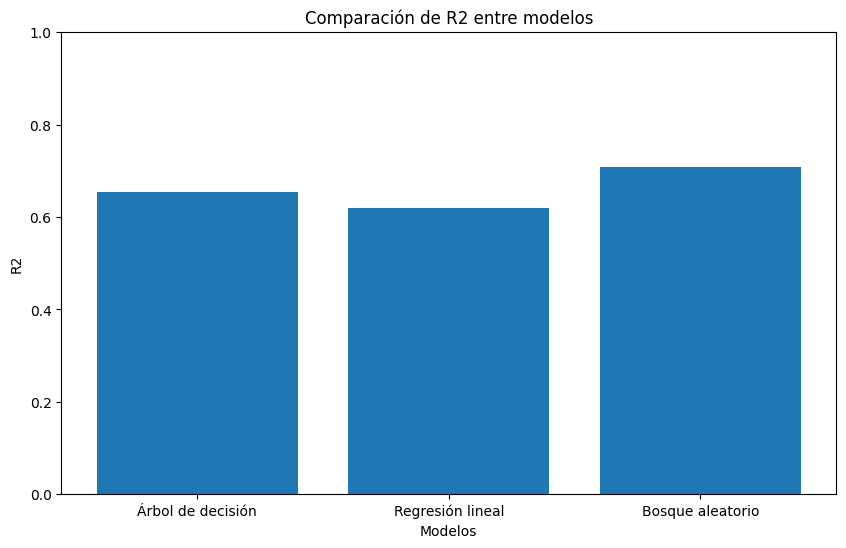

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.title('Comparison of R2 between models')
plt.ylim(0, 1)  # Establecer el rango del eje y entre 0 y 1 para R2
plt.show()

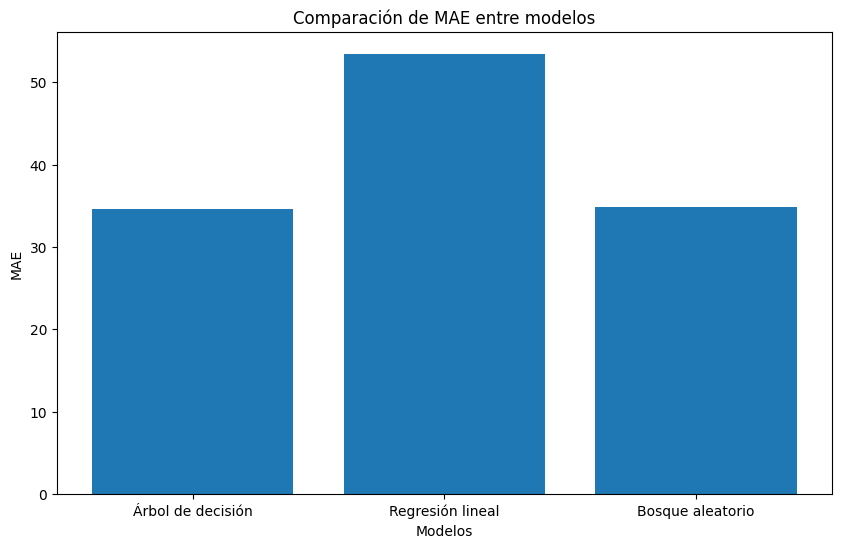

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores)
plt.xlabel('Modelos')
plt.ylabel('MAE')
plt.title('Comparison of MAE between models')
plt.show()